In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,20)

In [2]:
df1 = pd.read_csv('Pakistan_estate.csv')
df1.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,NaN,NaN,1089.004
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,NaN,NaN,15246.056
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,NaN,NaN,2178.008
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,4/5/2019,NaN,NaN,10890.000
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008


In [4]:
df1.isnull().sum()

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Total_Area           0
dtype: int64

In [5]:
df2 = df1.drop(['property_id','location_id','location','purpose','date_added','agency','agent','page_url'],axis='columns')
df2.head()

,property_type,price,city,province_name,latitude,longitude,baths,bedrooms,Total_Area
0,Flat,10000000,Islamabad,Islamabad Capital,33.679890,73.012640,2,2,1089.004
1,Flat,6900000,Islamabad,Islamabad Capital,33.700993,72.971492,3,3,15246.056
2,House,16500000,Islamabad,Islamabad Capital,33.631486,72.926559,6,5,2178.008
3,House,43500000,Islamabad,Islamabad Capital,33.707573,73.151199,4,4,10890.000
4,House,7000000,Islamabad,Islamabad Capital,33.492591,73.301339,3,3,2178.008


In [6]:
df2.isnull().sum()

property_type    0
price            0
city             0
province_name    0
latitude         0
longitude        0
baths            0
bedrooms         0
Total_Area       0
dtype: int64

In [7]:
# duplicates data finding...
duplicate = df2[df2.duplicated()]
duplicate

,property_type,price,city,province_name,latitude,longitude,baths,bedrooms,Total_Area
188,House,58500000,Karachi,Sindh,24.956491,67.219341,5,4,3811.514
278,House,23000000,Lahore,Punjab,31.533270,74.413580,5,4,2722.510
297,House,17500000,Lahore,Punjab,31.374195,74.191482,6,5,2722.510
308,House,22000000,Lahore,Punjab,31.537458,74.413323,5,4,2722.510
373,Flat,5000000,Islamabad,Islamabad Capital,33.698137,72.978215,2,2,1089.004
...,...,...,...,...,...,...,...,...,...
168440,Flat,4800000,Karachi,Sindh,25.022481,67.129082,0,2,10345.538
168441,House,26500000,Karachi,Sindh,25.029909,67.137192,0,6,26136.096
168442,House,12500000,Karachi,Sindh,25.017951,67.136393,0,3,2178.008
168443,House,27000000,Karachi,Sindh,25.015384,67.116330,0,6,26136.096


In [8]:
# removing duplicates data 
df_d = df2.drop_duplicates()
df_d

,property_type,price,city,province_name,latitude,longitude,baths,bedrooms,Total_Area
0,Flat,10000000,Islamabad,Islamabad Capital,33.679890,73.012640,2,2,1089.004
1,Flat,6900000,Islamabad,Islamabad Capital,33.700993,72.971492,3,3,15246.056
2,House,16500000,Islamabad,Islamabad Capital,33.631486,72.926559,6,5,2178.008
3,House,43500000,Islamabad,Islamabad Capital,33.707573,73.151199,4,4,10890.000
4,House,7000000,Islamabad,Islamabad Capital,33.492591,73.301339,3,3,2178.008
...,...,...,...,...,...,...,...,...,...
168423,House,39000000,Lahore,Punjab,31.468350,74.401603,6,5,5445.000
168424,House,28000000,Lahore,Punjab,31.359647,74.253073,7,6,5445.000
168428,House,20500000,Lahore,Punjab,31.494408,74.437666,4,3,2722.510
168431,House,14000000,Karachi,Sindh,24.894076,67.027715,4,3,1633.506


In [9]:
from scipy import stats

df_d = df_d[df_d.baths != 0]
df_d = df_d[df_d.bedrooms != 0]
df_d = df_d[df_d.Total_Area != 0]

# Remove Outliers
df_d = df_d[(
    np.abs(stats.zscore(df_d['Total_Area'])) < 3)]
df_d = df_d[(
    np.abs(stats.zscore(df_d['bedrooms'])) < 3)]
df_d = df_d[(
    np.abs(stats.zscore(df_d['baths'])) < 3)]
df_d = df_d[(
    np.abs(stats.zscore(df_d['price'])) < 3)]
df_d

,property_type,price,city,province_name,latitude,longitude,baths,bedrooms,Total_Area
0,Flat,10000000,Islamabad,Islamabad Capital,33.679890,73.012640,2,2,1089.004
1,Flat,6900000,Islamabad,Islamabad Capital,33.700993,72.971492,3,3,15246.056
2,House,16500000,Islamabad,Islamabad Capital,33.631486,72.926559,6,5,2178.008
3,House,43500000,Islamabad,Islamabad Capital,33.707573,73.151199,4,4,10890.000
4,House,7000000,Islamabad,Islamabad Capital,33.492591,73.301339,3,3,2178.008
...,...,...,...,...,...,...,...,...,...
168422,House,22500000,Lahore,Punjab,31.438989,74.404049,3,3,2722.510
168423,House,39000000,Lahore,Punjab,31.468350,74.401603,6,5,5445.000
168424,House,28000000,Lahore,Punjab,31.359647,74.253073,7,6,5445.000
168428,House,20500000,Lahore,Punjab,31.494408,74.437666,4,3,2722.510


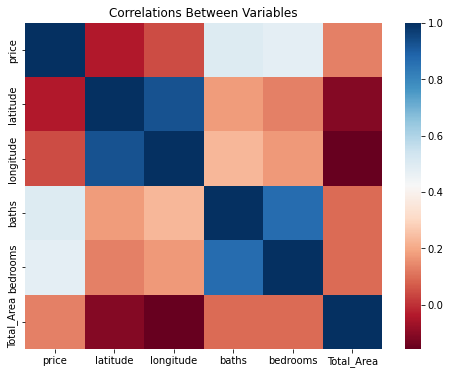

In [10]:
import seaborn as sns 
plt.figure(figsize=(8,6))
sns.heatmap(df_d.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=12)
plt.show()

<AxesSubplot:xlabel='city', ylabel='count'>

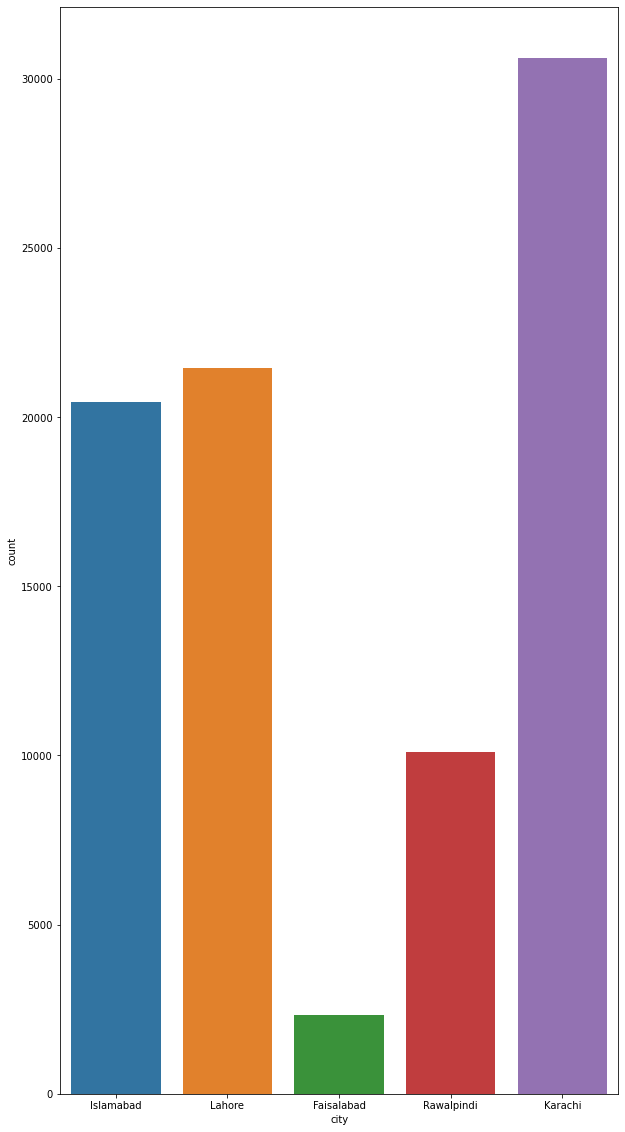

In [11]:
sns.countplot(x ='city', data = df_d)

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

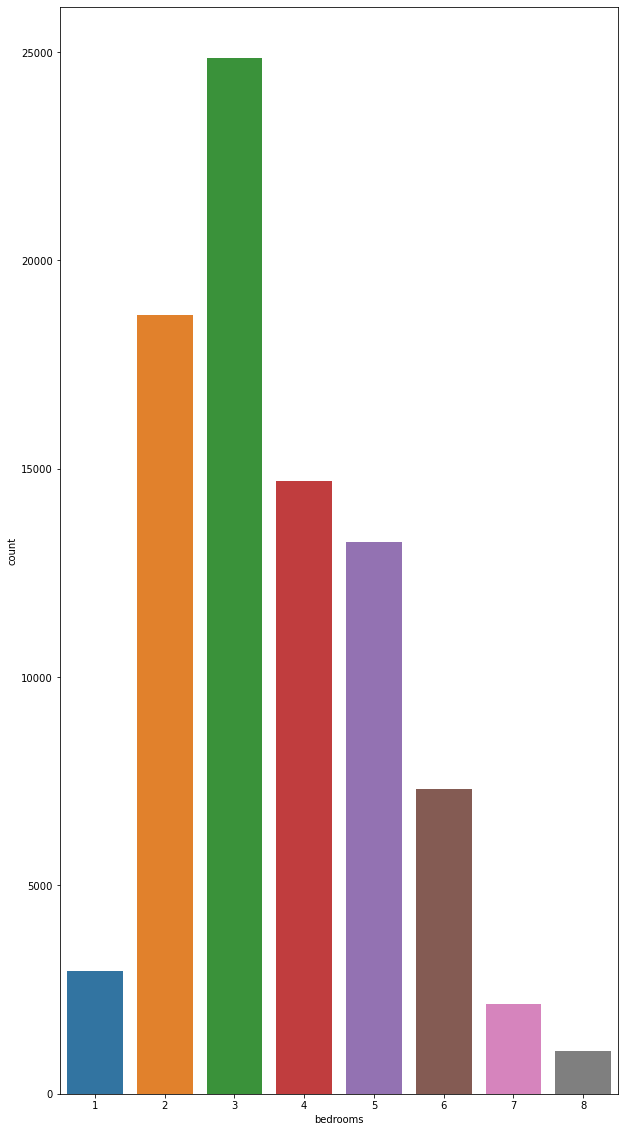

In [12]:
sns.countplot(x ='bedrooms', data = df_d)

<AxesSubplot:xlabel='baths', ylabel='count'>

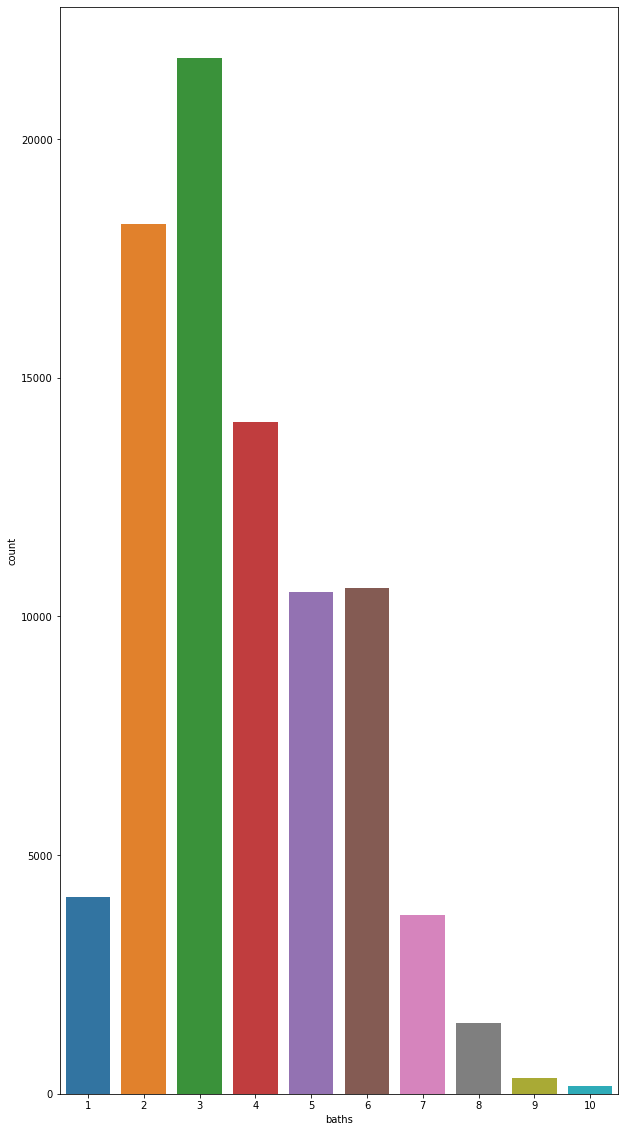

In [14]:
sns.countplot(x ='baths', data = df_d)

<AxesSubplot:xlabel='province_name', ylabel='count'>

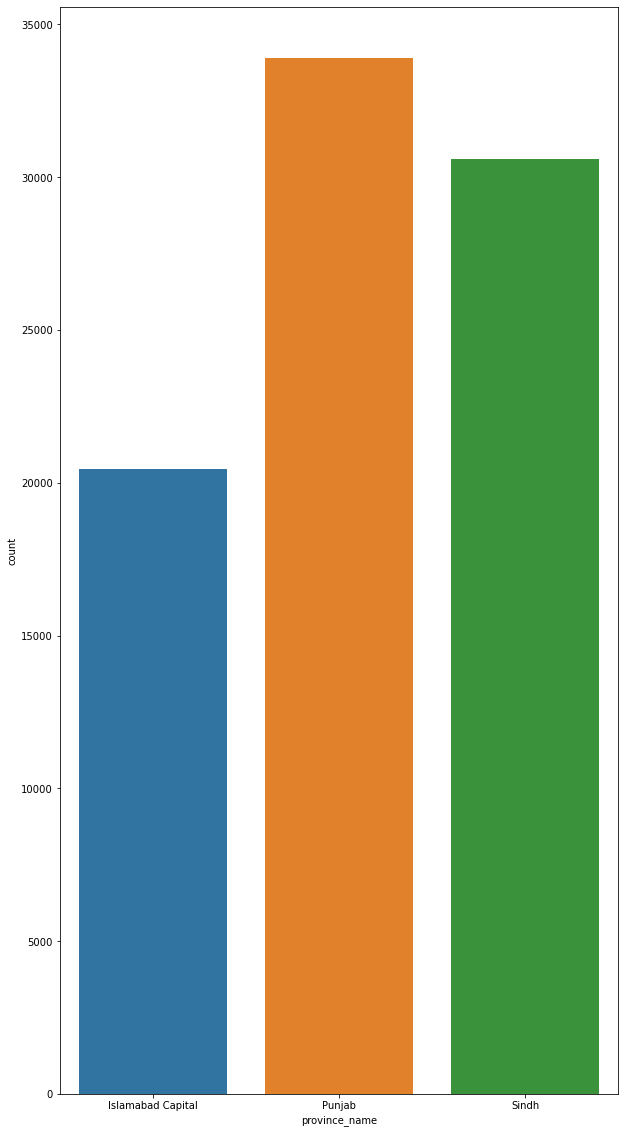

In [15]:
sns.countplot(x ='province_name', data = df_d)

<AxesSubplot:xlabel='property_type', ylabel='count'>

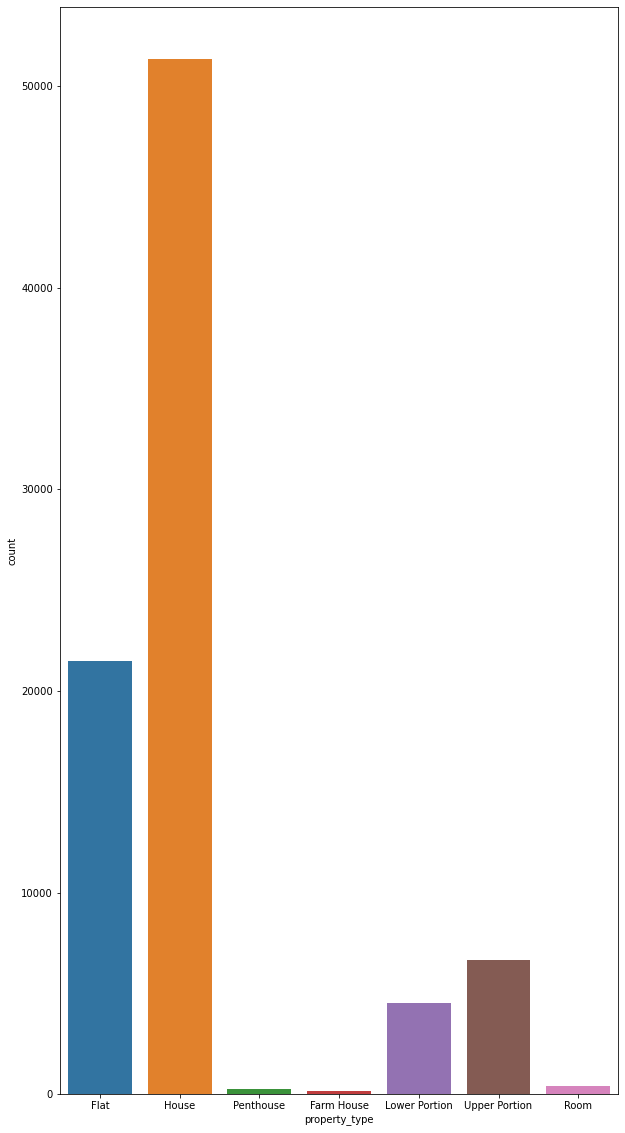

In [16]:
sns.countplot(x ='property_type', data = df_d)

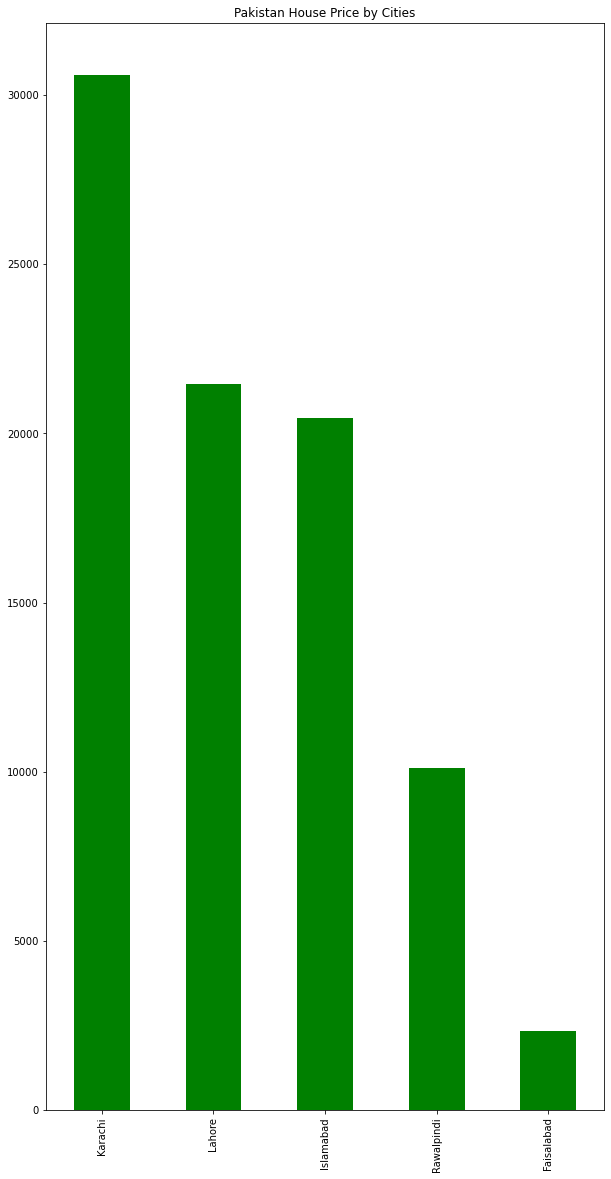

In [17]:
df_d['city'].value_counts().head(10).plot(kind='bar', color='g')
plt.title('Pakistan House Price by Cities');

In [18]:
df_d.groupby('city')['city'].agg('count')

city
Faisalabad     2330
Islamabad     20444
Karachi       30599
Lahore        21450
Rawalpindi    10103
Name: city, dtype: int64

In [19]:
df_d.groupby('property_type')['property_type'].agg('count')

property_type
Farm House         175
Flat             21487
House            51347
Lower Portion     4545
Penthouse          262
Room               427
Upper Portion     6683
Name: property_type, dtype: int64

In [20]:
df_d['price_per_area'] = df_d['price']/df_d['Total_Area']
df_d

,property_type,price,city,province_name,latitude,longitude,baths,bedrooms,Total_Area,price_per_area
0,Flat,10000000,Islamabad,Islamabad Capital,33.679890,73.012640,2,2,1089.004,9182.702727
1,Flat,6900000,Islamabad,Islamabad Capital,33.700993,72.971492,3,3,15246.056,452.576063
2,House,16500000,Islamabad,Islamabad Capital,33.631486,72.926559,6,5,2178.008,7575.729749
3,House,43500000,Islamabad,Islamabad Capital,33.707573,73.151199,4,4,10890.000,3994.490358
4,House,7000000,Islamabad,Islamabad Capital,33.492591,73.301339,3,3,2178.008,3213.945954
...,...,...,...,...,...,...,...,...,...,...
168422,House,22500000,Lahore,Punjab,31.438989,74.404049,3,3,2722.510,8264.432454
168423,House,39000000,Lahore,Punjab,31.468350,74.401603,6,5,5445.000,7162.534435
168424,House,28000000,Lahore,Punjab,31.359647,74.253073,7,6,5445.000,5142.332415
168428,House,20500000,Lahore,Punjab,31.494408,74.437666,4,3,2722.510,7529.816236


Dummy data one hot encoding from my own code 

In [21]:
property_type_n = []
city_n = []
province_n = []
for pt,c,p in zip(df_d.property_type,df_d.city,df_d.province_name):
    if pt == 'Flat':
        property_type_n.append(1)
    elif pt == 'House':
        property_type_n.append(2)
    elif pt == 'Penthouse':
        property_type_n.append(3)
    elif pt == 'Farm House':
        property_type_n.append(4)
    elif pt == 'Room':
        property_type_n.append(5)
    elif pt == 'Lower Portion':
        property_type_n.append(6)
    elif pt == 'Upper Portion':
        property_type_n.append(7)
    

    if c == 'Islamabad':
        city_n.append(1)
    elif c == 'Karachi':
        city_n.append(2)
    elif c == 'Lahore':
        city_n.append(3)
    elif c == 'Rawalpindi':
        city_n.append(4)
    elif c == 'Faisalabad':
        city_n.append(5)
    
    if p == 'Islamabad Capital':
        province_n.append(1)
    elif p == 'Punjab':
        province_n.append(2)
    elif p == 'Sindh':
        province_n.append(3)

In [22]:
df3 = df_d.drop(['property_type','city','province_name','price_per_area'],axis='columns')
df3.head()

,price,latitude,longitude,baths,bedrooms,Total_Area
0,10000000,33.679890,73.012640,2,2,1089.004
1,6900000,33.700993,72.971492,3,3,15246.056
2,16500000,33.631486,72.926559,6,5,2178.008
3,43500000,33.707573,73.151199,4,4,10890.000
4,7000000,33.492591,73.301339,3,3,2178.008


In [23]:
df_n = df3.copy()
df_n['city_n'] = city_n
df_n['poperty_type_n'] = property_type_n
df_n['province_name'] = province_n
df_n.head()

,price,latitude,longitude,baths,bedrooms,Total_Area,city_n,poperty_type_n,province_name
0,10000000,33.679890,73.012640,2,2,1089.004,1,1,1
1,6900000,33.700993,72.971492,3,3,15246.056,1,1,1
2,16500000,33.631486,72.926559,6,5,2178.008,1,2,1
3,43500000,33.707573,73.151199,4,4,10890.000,1,2,1
4,7000000,33.492591,73.301339,3,3,2178.008,1,2,1


In [24]:
df4 = df_d.drop(['Total_Area','price_per_area','baths','bedrooms','longitude','latitude','price'],axis='columns')
df4

,property_type,city,province_name
0,Flat,Islamabad,Islamabad Capital
1,Flat,Islamabad,Islamabad Capital
2,House,Islamabad,Islamabad Capital
3,House,Islamabad,Islamabad Capital
4,House,Islamabad,Islamabad Capital
...,...,...,...
168422,House,Lahore,Punjab
168423,House,Lahore,Punjab
168424,House,Lahore,Punjab
168428,House,Lahore,Punjab


One Hot-Encoding

In [25]:
dummy = pd.get_dummies(df4)
dummy

,property_type_Farm House,property_type_Flat,property_type_House,property_type_Lower Portion,property_type_Penthouse,property_type_Room,property_type_Upper Portion,city_Faisalabad,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,province_name_Islamabad Capital,province_name_Punjab,province_name_Sindh
0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168422,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
168423,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
168424,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
168428,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [26]:
df5 = pd.concat([df3,dummy],axis='columns')
df5

,price,latitude,longitude,baths,bedrooms,Total_Area,property_type_Farm House,property_type_Flat,property_type_House,property_type_Lower Portion,...,property_type_Room,property_type_Upper Portion,city_Faisalabad,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,province_name_Islamabad Capital,province_name_Punjab,province_name_Sindh
0,10000000,33.679890,73.012640,2,2,1089.004,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,6900000,33.700993,72.971492,3,3,15246.056,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,16500000,33.631486,72.926559,6,5,2178.008,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
3,43500000,33.707573,73.151199,4,4,10890.000,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,7000000,33.492591,73.301339,3,3,2178.008,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168422,22500000,31.438989,74.404049,3,3,2722.510,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
168423,39000000,31.468350,74.401603,6,5,5445.000,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
168424,28000000,31.359647,74.253073,7,6,5445.000,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
168428,20500000,31.494408,74.437666,4,3,2722.510,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [27]:
X = df_n.drop(['price'],axis='columns')
y = df_n.price
X

,latitude,longitude,baths,bedrooms,Total_Area,city_n,poperty_type_n,province_name
0,33.679890,73.012640,2,2,1089.004,1,1,1
1,33.700993,72.971492,3,3,15246.056,1,1,1
2,33.631486,72.926559,6,5,2178.008,1,2,1
3,33.707573,73.151199,4,4,10890.000,1,2,1
4,33.492591,73.301339,3,3,2178.008,1,2,1
...,...,...,...,...,...,...,...,...
168422,31.438989,74.404049,3,3,2722.510,3,2,2
168423,31.468350,74.401603,6,5,5445.000,3,2,2
168424,31.359647,74.253073,7,6,5445.000,3,2,2
168428,31.494408,74.437666,4,3,2722.510,3,2,2


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [37]:
X_n = df5.drop(['price'],axis='columns')
y_n = df5.price

In [40]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_n,y_n,test_size=0.2,random_state=10)

In [42]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.3132345027588893

In [30]:
# Use K Fold cross validation to measure accuracy of our LinearRegression model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.32184316, 0.32400013, 0.32440306, 0.31745055, 0.3183384 ])

In [31]:
# Find best model using GridSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)


C:\Users\HashmatAli\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\HashmatAli\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipelin

C:\Users\HashmatAli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.944e+17, tolerance: 2.453e+15
  model = cd_fast.enet_coordinate_descent(
C:\Users\HashmatAli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.264e+15, tolerance: 2.430e+15
  model = cd_fast.enet_coordinate_descent(
C:\Users\HashmatAli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.37

,model,best_score,best_params
0,linear_regression,0.321207,{'normalize': True}
1,lasso,0.321207,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.404828,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model = LogisticRegression()

In [43]:
X_n = df5.drop(['price'],axis='columns')
y_n = df5.price

In [44]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_n,y_n,test_size=0.2,random_state=10)

In [45]:
model.fit(Xtrain,ytrain)

C:\Users\HashmatAli\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
model.predict(Xtest)

array([15000000, 35000000, 15000000, ..., 15000000, 35000000, 15000000],
      dtype=int64)

In [47]:
model.score(Xtest,ytest)

0.012657482632756388

In [48]:
lr_clf.predict([[33.679890,73.012640,2,2,1089.004,1,1,1]])

C:\Users\HashmatAli\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1127762.81457597])

In [49]:
header = ['price','latitude','longitude','baths','bedrooms','Total_Area','city_n','poperty_type_n','province_name']

In [50]:
df_price = df_n.price

In [51]:
df_price.to_csv('homePricenew.csv',index=False)

Random Forest Regression

In [52]:
from sklearn.ensemble import RandomForestRegressor
RFRegress = RandomForestRegressor()
RFRegress.fit(X_train, y_train)

RandomForestRegressor()

In [54]:
RFRegress.score(X_test,y_test)

0.5496283118104753

In [55]:
RFRegress.predict(X_test)

array([13827140.        ,   882170.03968254, 15735500.        , ...,
         122987.9491342 ,  7833702.83333333,  9237802.        ])

Decision Tree 

In [56]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [57]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [58]:
model.predict(X_test)

array([12500000,   300000, 17500000, ...,    95000,    18000,  9000000],
      dtype=int64)

In [59]:
model.score(X_test,y_test)

0.03290945484516661

In [60]:
df_n

,price,latitude,longitude,baths,bedrooms,Total_Area,city_n,poperty_type_n,province_name
0,10000000,33.679890,73.012640,2,2,1089.004,1,1,1
1,6900000,33.700993,72.971492,3,3,15246.056,1,1,1
2,16500000,33.631486,72.926559,6,5,2178.008,1,2,1
3,43500000,33.707573,73.151199,4,4,10890.000,1,2,1
4,7000000,33.492591,73.301339,3,3,2178.008,1,2,1
...,...,...,...,...,...,...,...,...,...
168422,22500000,31.438989,74.404049,3,3,2722.510,3,2,2
168423,39000000,31.468350,74.401603,6,5,5445.000,3,2,2
168424,28000000,31.359647,74.253073,7,6,5445.000,3,2,2
168428,20500000,31.494408,74.437666,4,3,2722.510,3,2,2
